In [2]:
#imports

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

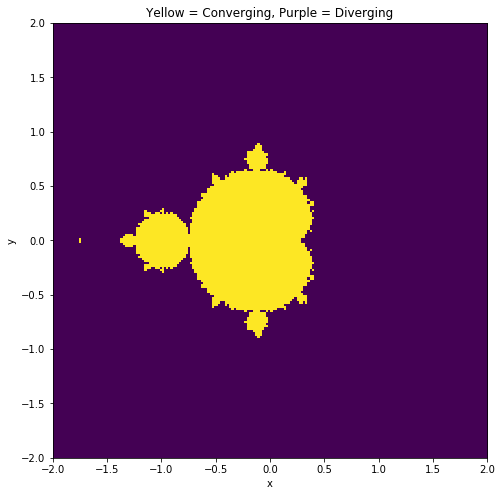

In [10]:
# Question 1

z0 = 0

x_list = np.linspace(-2, 2, 200)
y_list = np.linspace(-2, 2, 200)
z_list = np.zeros((200,200))

xcounter = 0
for x in x_list:
    ycounter = 0
    for y in y_list:
        c = x+y*1j

        for i in range(100):
            if i == 0:
                z = c
                z2 = np.real(z)**2 + np.imag(z)**2
                
            if z2 > 100:
                continue
                
            z = z**2 + c
            z2 = np.real(z)**2 + np.imag(z)**2
            
            if i == 99:
                z_list[ycounter][xcounter] = 1

        ycounter += 1
    xcounter += 1

plt.figure(figsize=(8,8))
plot = plt.imshow(z_list, extent = [-2,2,-2,2])
plt.title('Yellow = Converging, Purple = Diverging')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('mandelbrot1.png', dpi=400)
plt.show()


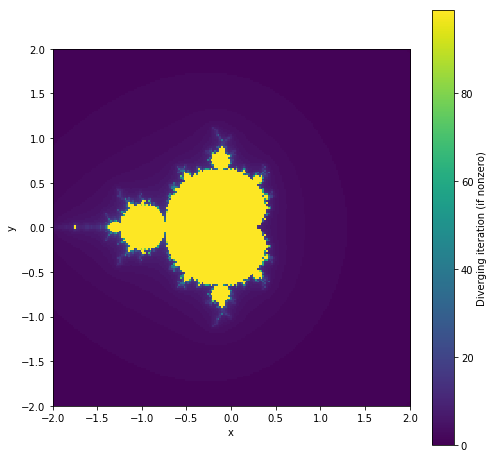

In [9]:
# Now color represents iteration number in which a givin point diverges according to the Mandelbrot set, 
# for 100 iterations at a threshold of z^2 < 100

xcounter = 0
for x in x_list:
    ycounter = 0
    for y in y_list:
        c = x+y*1j

        for i in range(100):
            if i == 0:
                z = c
                z2 = np.real(z)**2 + np.imag(z)**2
                
            if z2 > 100:
                continue
                
            z = z**2 + c
            z2 = np.real(z)**2 + np.imag(z)**2
            z_list[ycounter][xcounter] = i

        ycounter += 1
    xcounter += 1

plt.figure(figsize=(8,8))
plot = plt.imshow(z_list, cmap='viridis', extent = [-2,2,-2,2])
plot = plt.colorbar()
plot.set_label('Diverging iteration (if nonzero)')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('mandelbrot2.png', dpi=400)
plt.show()

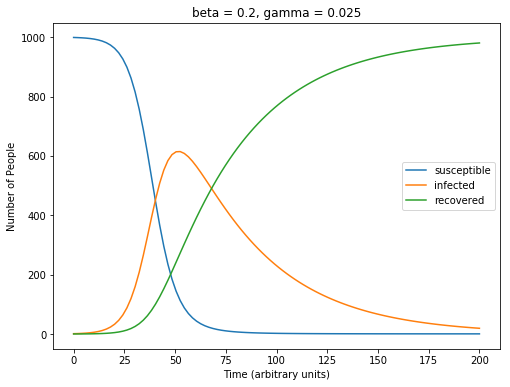

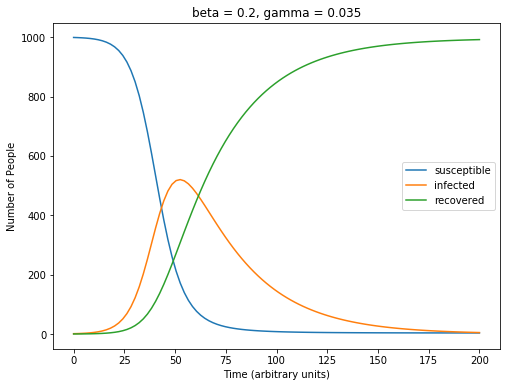

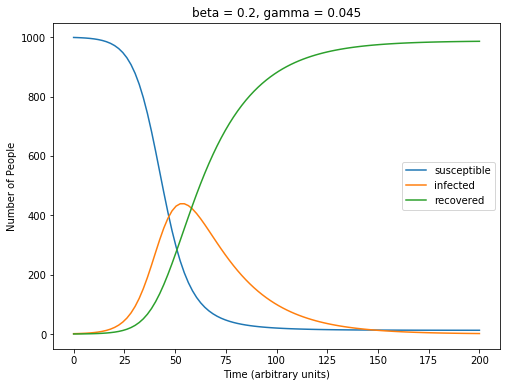

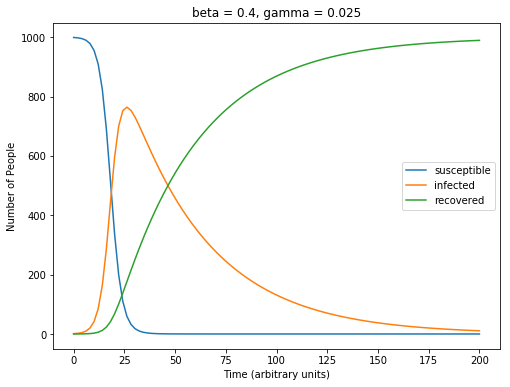

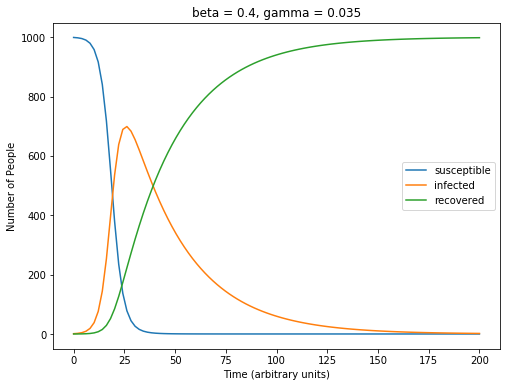

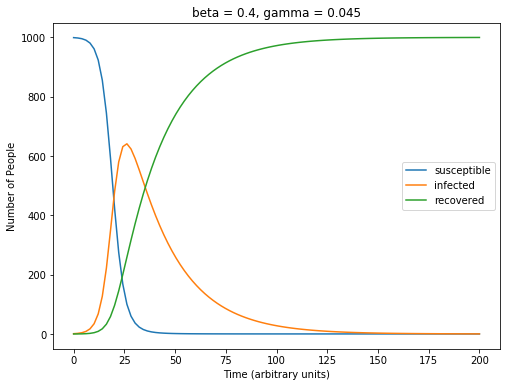

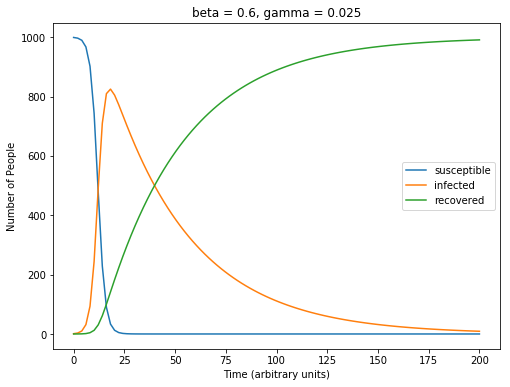

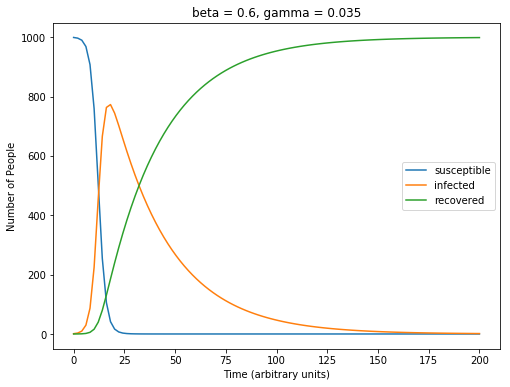

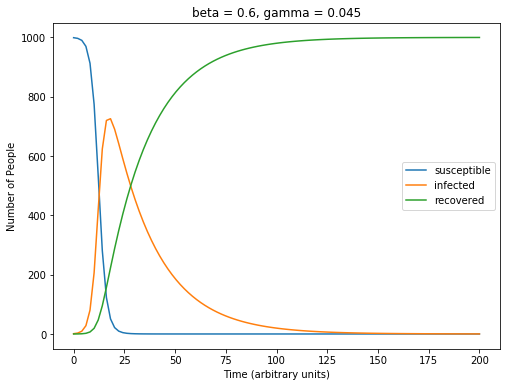

In [7]:
# Question 2

N = 1000
S0 = 999
I0 = 1
R0 = 0

def SIR_model(vector, t, beta, gamma):
    S, I, R = vector
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]

t = np.linspace(0, 200, 100)
beta = [0.2, 0.4, 0.6]
gamma = [0.025, 0.035, 0.045]

for b in beta:
    for g in gamma:

        sol = odeint(SIR_model, [S0, I0, R0], t, args=(b,g))
        S, I, R = sol[:,0], sol[:,1], sol[:,2]
        
        plt.figure(figsize=(8,6))
        plt.plot(t, S, label='susceptible')
        plt.plot(t, I, label='infected')
        plt.plot(t, R, label='recovered')
        plt.xlabel('Time (arbitrary units)')
        plt.ylabel('Number of People')
        plt.title('beta = {}, gamma = {}'.format(b,g))
        plt.legend()
        plt.show()


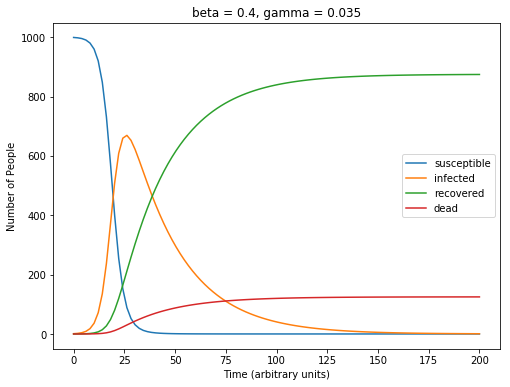

Wall time: 696 ms


In [15]:
%%time

def SIRD_model(vector, t, beta, gamma):
    S, I, R, D = vector
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I - mu*I
    dRdt = gamma*I
    dDdt = mu*I
    return [dSdt, dIdt, dRdt, dDdt]

mu = 0.005
beta = 0.4
gamma = 0.035
D0 = 0

sol = odeint(SIRD_model, [S0, I0, R0, D0], t, args=(beta,gamma))
S, I, R, D = sol[:,0], sol[:,1], sol[:,2], sol[:,3]

plt.figure(figsize=(8,6))
plt.plot(t, S, label='susceptible')
plt.plot(t, I, label='infected')
plt.plot(t, R, label='recovered')
plt.plot(t, D, label='dead')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Number of People')
plt.title('beta = {}, gamma = {}'.format(beta,gamma))
plt.legend()
plt.savefig('SIRD.png', dpi=400)
plt.show()


https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIRD_model